## Import Relevant Packages

In [52]:
import torch
from torch import nn
from torchvision import models, transforms
import os
from PIL import Image
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'torchcam'

## Tools

In [43]:
def show_images(images, num_rows, num_cols, titles=None, scale=1.5, grayscale=False):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, images)):
        if grayscale and img.size(0) == 1:
            print(img.shape)
            print(img.numpy().reshape(1, img.shape[0], img.shape[1]))
            ax.imshow(img.numpy().reshape(1, img.shape[0], img.shape[1]), cmap='gray')
        else:
            ax.imshow(img.permute(1, 2, 0).numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

## Data Loader

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([17, 3, 224, 224])


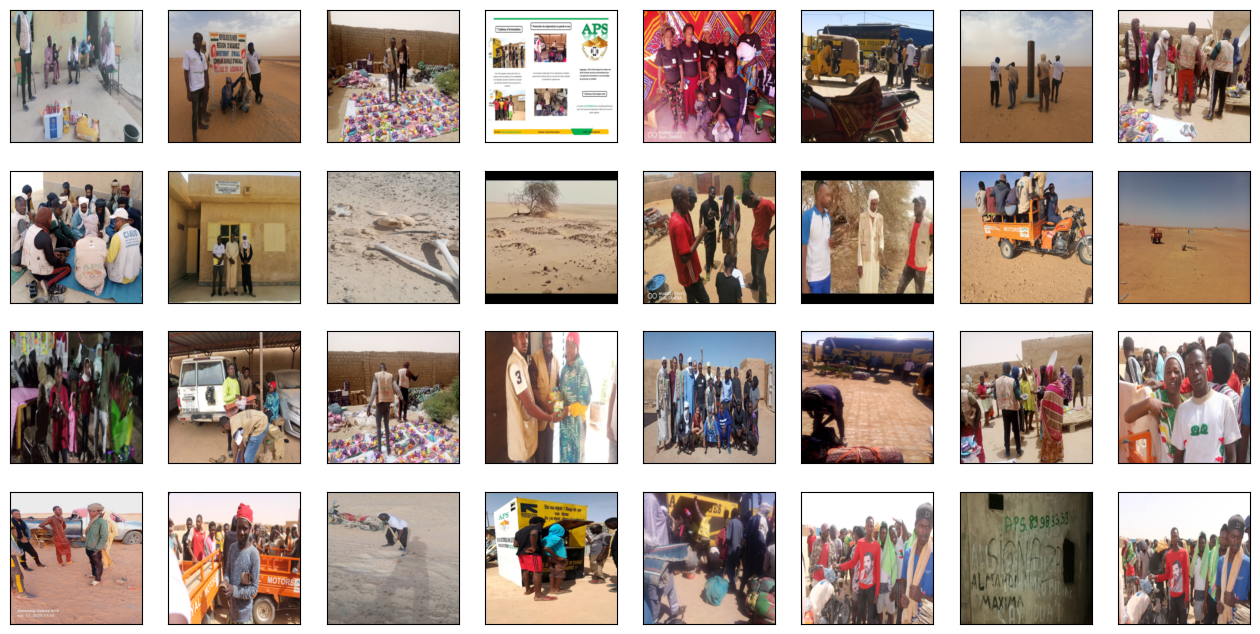

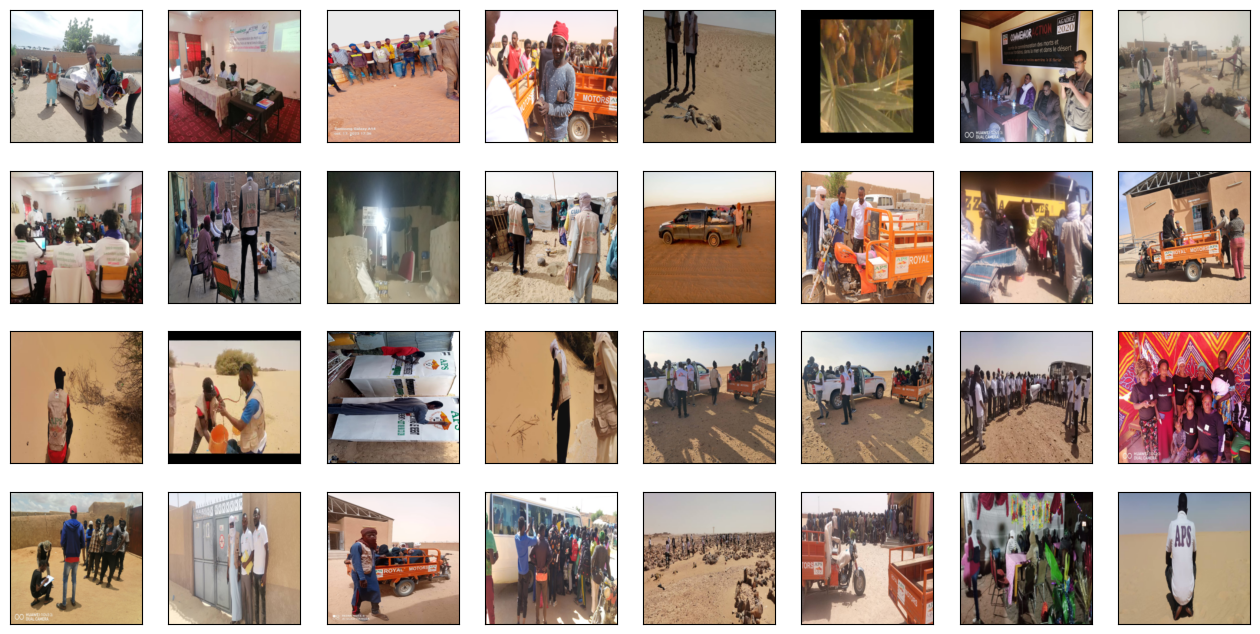

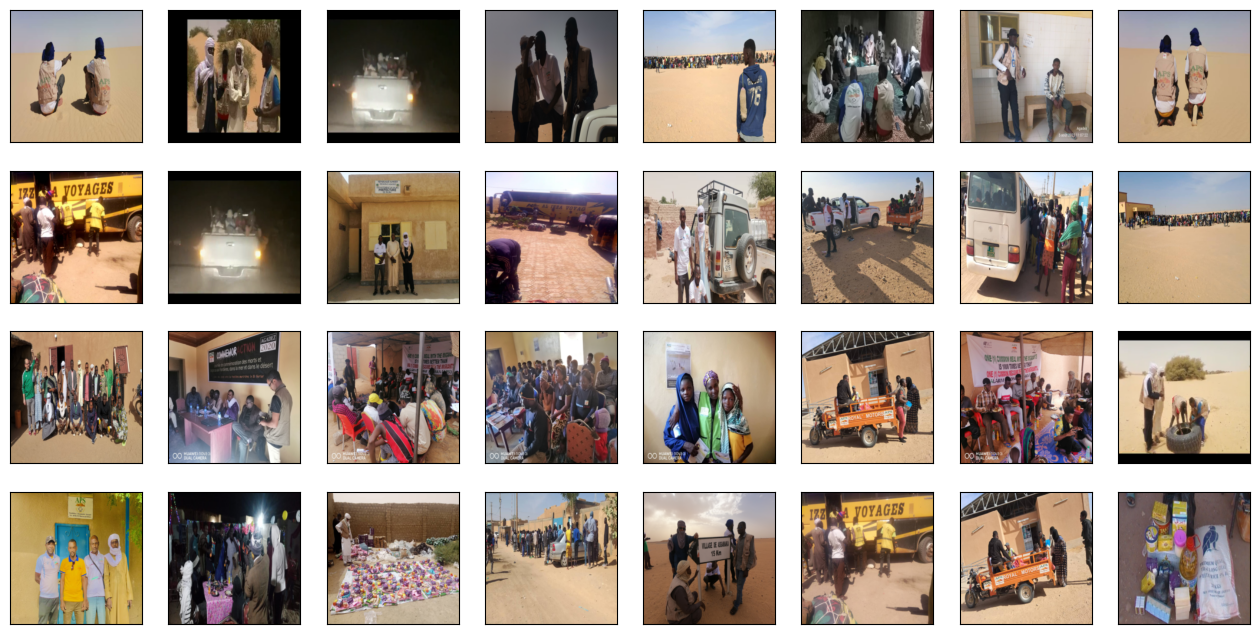

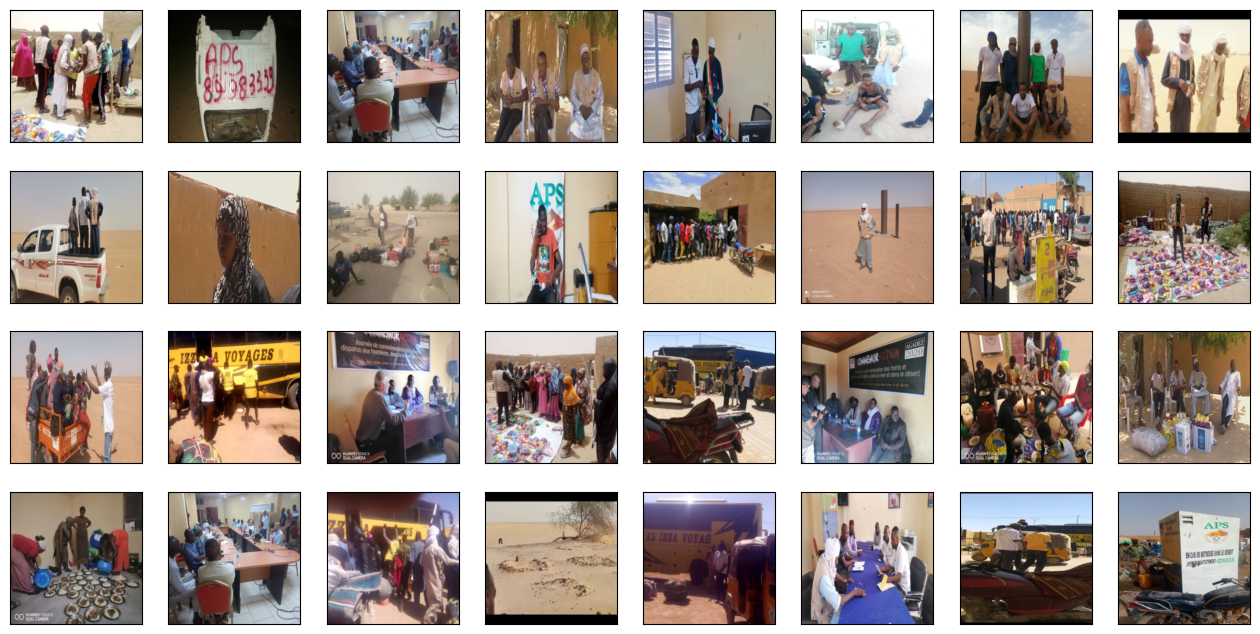

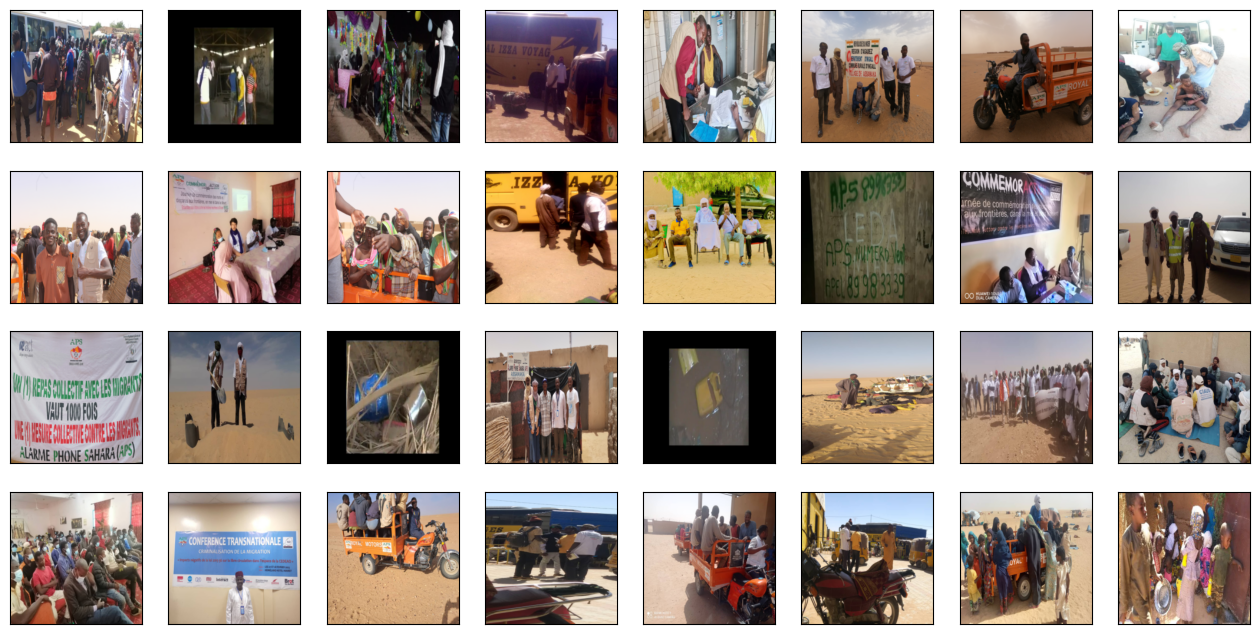

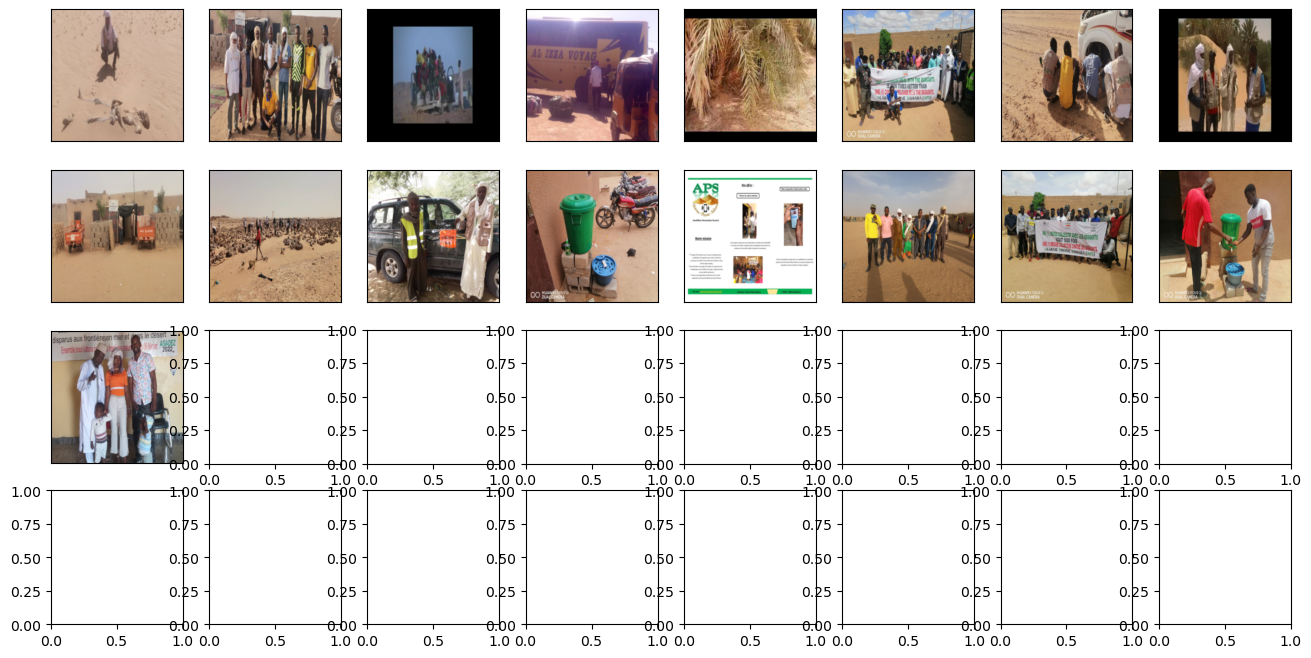

In [27]:
# Custom dataset class to load images without labels
class ImageFolderNoLabel(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = os.listdir(root)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root, self.images[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),           # Convert images to PyTorch tensors

])

# Create a dataset from the folder containing the images
dataset = ImageFolderNoLabel('../benchmark/datasets/agadez', transform=transform)

# Create a data loader to load images in batches
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate over the data loader to access the images
for images in data_loader:
    # Do something with the images (e.g., pass them through a neural network)
    print(images.shape)
    show_images(images, num_rows=4, num_cols=8, scale=2)


## Modelling

In [17]:
# Define vgg16 model
model = models.vgg16(pretrained=True)

/home/bimokhtari1/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bimokhtari1/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.features.register_forward_hook(get_activation('features'))
output = model(images)
activation['features'].shape

torch.Size([17, 512, 7, 7])

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

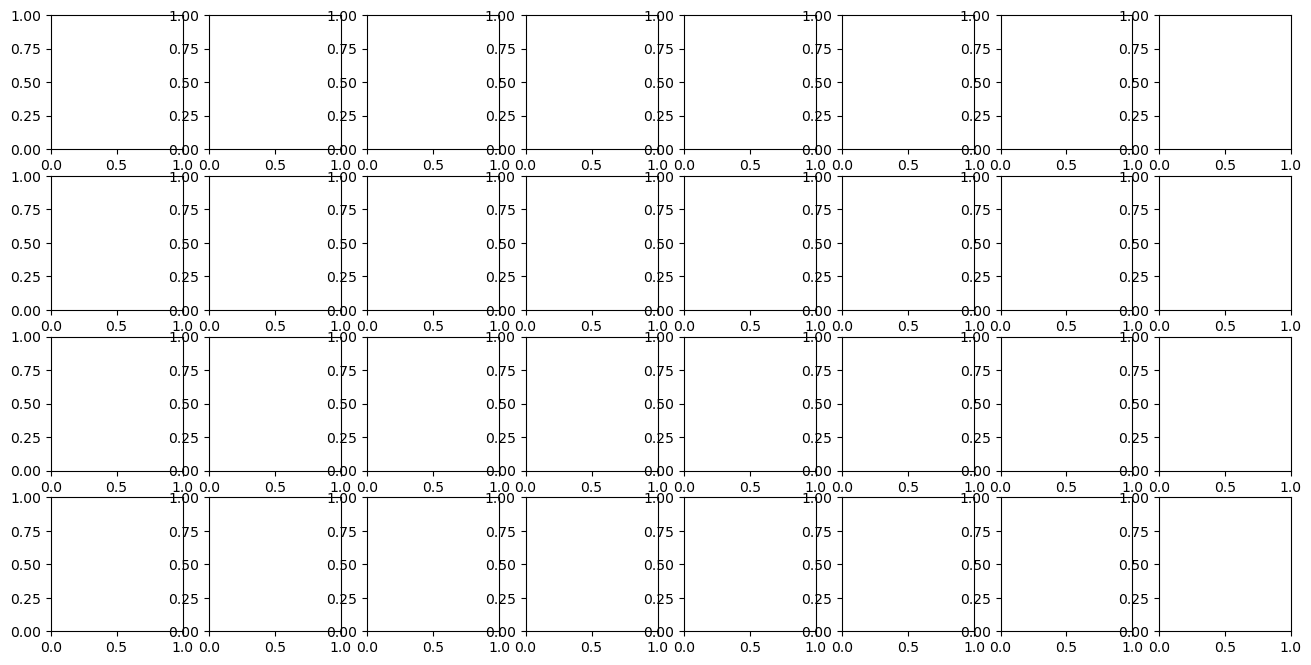

In [44]:
show_images(activation['features'][:, 0, :, :], num_rows=4, num_cols=8, scale=2)